In [1]:
rm(list=ls())
library("BeSS")
library(stringr)
setwd(paste0(strsplit(getwd(),split = "/code"), "/dataset"))
total=read.csv("clean dataset.csv")
total = total[,-c(1,3)]
head(as.matrix(total))

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [2]:
aic_bess = c()
bic_bess = c()
gic_bess = c()
mse_bess = c()
aic_bess[1] = Inf
bic_bess[1] = Inf
gic_bess[1] = Inf
mse_bess[1] = Inf
for ( i in 2:(length(total[1,])-1)){
  model_bic <- bess.one(x = total[,-1],y = total[,1],s = i)
  mse_bess[i] = model_bic$mse
  aic_bess[i] = model_bic$AIC
  bic_bess[i] = model_bic$BIC
  gic_bess[i] = model_bic$GIC
}
c(which(mse_bess[] == min(mse_bess)), which(aic_bess[] == min(aic_bess)),which(bic_bess[] == min(bic_bess)),which(gic_bess[] == min(gic_bess)))


[1] 14  6  5  5

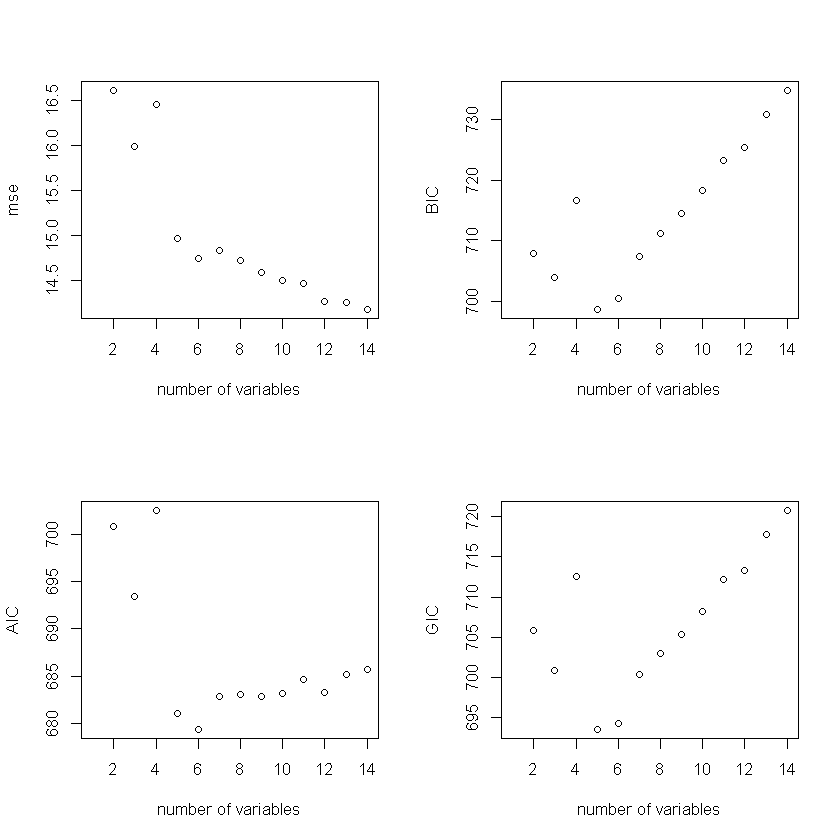

In [3]:
layout(matrix(1:4,ncol = 2))
plot(x = 2:length(total[1,])-1, y = mse_bess,xlab = "number of variables",ylab = "mse")
plot(x = 2:length(total[1,])-1, y =aic_bess,xlab = "number of variables",ylab = "AIC")
plot(x = 2:length(total[1,])-1, y =bic_bess,xlab = "number of variables",ylab = "BIC")
plot(x = 2:length(total[1,])-1, y =gic_bess,xlab = "number of variables",ylab = "GIC")

thus based on the BIC creterion, the best choice of variables are the weight, adiposity, chest, abdomen and wrist.

Since from our experience, the wrist will not change too much from a slim person to the fat one, we try to leave it out and see how does bic change.

### the optimal choice, keep 5 variables included

In [13]:
summary(model_bess_5 <- bess.one(y = total[,1], x = total[,-1],s = 5))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 5 includes predictors: 

     WEIGHT   ADIPOSITY       CHEST     ABDOMEN       WRIST 
-0.08553549  0.32860993 -0.10629224  0.85750192 -1.27843665 

    log-likelihood:   -335.5116 
    deviance:          671.0233 
    AIC:               681.0233 
    BIC:               698.5904 
    GIC:               693.5501 
----------------------------------------------------------------------


### leave WRIST out

In [6]:
summary(model_bess_4 <- bess.one(y = total[,1], x = total[,-1],s = 4))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 4 includes predictors: 

 ADIPOSITY      CHEST    ABDOMEN        HIP 
 0.4093457 -0.3021311  0.8802117 -0.3180236 

    log-likelihood:   -347.2795 
    deviance:          694.559 
    AIC:               702.559 
    BIC:               716.6127 
    GIC:               712.5805 
----------------------------------------------------------------------


#### try 3 variables

In [7]:
summary(model_bess_3 <- bess.one(y = total[,1], x = total[,-1],s = 3))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 3 includes predictors: 

    HEIGHT      CHEST    ABDOMEN 
-0.4797692 -0.2350179  0.8042798 

    log-likelihood:   -343.7206 
    deviance:          687.4412 
    AIC:               693.4412 
    BIC:               703.9815 
    GIC:               700.9573 
----------------------------------------------------------------------


Adjust R square only changes from 0.7226 to 0.7118, and it is too small to keep WRIST as one independent variable.

# Cross Validation

In [8]:
rm(list=ls())
library("BeSS")
setwd('C:/Users/Tansu/Documents/GitHub/UW-STAT628-M2/dataset')
total=read.csv("clean dataset.csv")
total = total[,-c(1,3)]
head(as.matrix(total))

summary(model_bess <- bess.one(y = total[,1], x = total[,-1],s = 3))
times = 1000
mse_bess_5 <- rep(0,times)
mse_bess_4 <- rep(0,times)
mse_bess_3 <- rep(0,times)
total_bess_5 <- rep(0,times)
total_bess_4 <- rep(0,times)
total_bess_3 <- rep(0,times)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 3 includes predictors: 

    HEIGHT      CHEST    ABDOMEN 
-0.4797692 -0.2350179  0.8042798 

    log-likelihood:   -343.7206 
    deviance:          687.4412 
    AIC:               693.4412 
    BIC:               703.9815 
    GIC:               700.9573 
----------------------------------------------------------------------


In [9]:
for (g in 1:times){
  choices = sample(1: length(total[,1]),82*2)
  test <- total[as.vector(choices),]
  val <- total[-as.vector(choices),]
  
  model_bess_3 <- bess.one(y = test[,1], x = test[,c(4,7,8)],s = 3)
  pre_bess_3 <-predict(model_bess_3,val,type = "BIC")
  
  model_bess_5 <- bess.one(y = test[,1], x = test[,c(3,5,7,8,15)],s = 5)
  pre_bess_5 <-predict(model_bess_5,val,type = "BIC")
  
  model_bess_4 <- bess.one(y = test[,1], x = test[,c(3,5,7,8)],s = 4)
  pre_bess_4 <-predict(model_bess_4,val,type = "BIC")
    
  ave <- ave(val[,1])
  for( i in 1:length(val[,1])){
    mse_bess_5[g] = as.numeric((pre_bess_5[i] - val[i,1])^2) + mse_bess_5[g]
    mse_bess_4[g] = as.numeric((pre_bess_4[i] - val[i,1])^2) + mse_bess_4[g]
    mse_bess_3[g] = as.numeric((pre_bess_3[i] - val[i,1])^2) + mse_bess_3[g]
    total_bess_5[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_5[g]
    total_bess_4[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_4[g]
    total_bess_3[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_3[g]
  }
}

In [10]:
R2_5 = 1 - mse_bess_5/total_bess_5
R2_4 = 1 - mse_bess_4/total_bess_4
R2_3 = 1 - mse_bess_3/total_bess_3
cat("the R square of 5 variables model is ",mean(R2_5),"\n")
cat("the R square of 4 variables model is ",mean(R2_4),"\n")
cat("the R square of 3 variables model is ",mean(R2_3),"\n")
 
cat("the MSE of 5 variables model is",mean(mse_bess_5/(length(total[,1])-82*2)),"\n")
cat("the MSE of 4 variables model is",mean(mse_bess_4/(length(total[,1])-82*2)),"\n")
cat("the MSE of 3 variables model is",mean(mse_bess_3/(length(total[,1])-82*2)),"\n")

the R square of 5 variables model is  0.7064114 
the R square of 4 variables model is  0.6968335 
the R square of 3 variables model is  0.6920139 
the MSE of 5 variables model is 15.92482 
the MSE of 4 variables model is 16.43817 
the MSE of 3 variables model is 16.6985 
